In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pmdarima as pm
from numpy.random import seed
from scipy import stats
import statsmodels.api as sm

In [2]:
# Justice League

In [3]:
Justic = pd.read_csv("Justice_Final.csv")
Justic = Justic[['Date', 'Units_Sold', 'Movie_Playing']]
Justic.head()

,Date,Units_Sold,Movie_Playing
0,1997-04,98818,0
1,1997-05,103498,0
2,1997-06,104030,0
3,1997-07,104947,0
4,1997-07,104403,0


In [4]:
Justic['Date'] = pd.to_datetime(Justic['Date'])

In [5]:
Justic.dtypes

Date             datetime64[ns]
Units_Sold                int64
Movie_Playing             int64
dtype: object

In [6]:
Justic.set_index('Date', inplace=True)
Justic.head()

,Units_Sold,Movie_Playing
Date,,
1997-04-01,98818,0
1997-05-01,103498,0
1997-06-01,104030,0
1997-07-01,104947,0
1997-07-01,104403,0


In [7]:
Justic.index

DatetimeIndex(['1997-04-01', '1997-05-01', '1997-06-01', '1997-07-01',
               '1997-07-01', '1997-08-01', '1997-09-01', '1997-10-01',
               '1997-11-01', '1997-12-01',
               ...
               '2019-08-01', '2019-08-01', '2019-09-01', '2019-09-01',
               '2019-10-01', '2019-10-01', '2019-11-01', '2019-11-01',
               '2019-12-01', '2019-12-01'],
              dtype='datetime64[ns]', name='Date', length=369, freq=None)

In [8]:
Justice = Justic.resample('M').mean()
Justice.head()

,Units_Sold,Movie_Playing
Date,,
1997-04-30,98818.0,0.0
1997-05-31,103498.0,0.0
1997-06-30,104030.0,0.0
1997-07-31,104675.0,0.0
1997-08-31,104676.0,0.0


In [9]:
Justice.isnull().values.any()

True

In [10]:
Justice.isnull().sum().sum()

34

In [11]:
is_NaN = Justice.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = Justice[row_has_NaN]
print(rows_with_NaN)

            Units_Sold  Movie_Playing
Date                                 
2001-01-31         NaN            NaN
2006-03-31         NaN            NaN
2006-04-30         NaN            NaN
2006-05-31         NaN            NaN
2006-06-30         NaN            NaN
2006-10-31         NaN            NaN
2007-01-31         NaN            NaN
2007-02-28         NaN            NaN
2007-11-30         NaN            NaN
2008-09-30         NaN            NaN
2008-11-30         NaN            NaN
2011-09-30         NaN            NaN
2013-09-30         NaN            NaN
2014-08-31         NaN            NaN
2015-03-31         NaN            NaN
2015-05-31         NaN            NaN
2018-05-31         NaN            NaN


In [12]:
Justice = Justice.fillna(method='ffill')

In [13]:
Justice.isnull().values.any()

False

In [14]:
#Statistics

In [15]:
np.random.seed(47)
N_rep = 10000
#Create function to run bootstrap sampling from
def bootstrap(data, func, N_rep):
    #Create empty array 
    bootstrap_rep = np.empty(N_rep)
    #Run bootstrap replicates
    for i in range(N_rep):
        bootstrap_sample = np.random.choice(data, len(data))
        bootstrap_rep[i] = func(bootstrap_sample)
    return bootstrap_rep

In [16]:
#Assign movie and no-movie array
movie = np.array(Justice[Justice['Movie_Playing']==1].Units_Sold)
no_movie = np.array(Justice[Justice['Movie_Playing']==0].Units_Sold)
#Find difference in mean between them
difference_mean = np.mean(movie) - np.mean(no_movie)
difference_mean

-21152.43920580861

In [17]:
#Difference of 10000 replicates
bootstrap_mean = bootstrap(movie, np.mean, N_rep) - bootstrap(no_movie, np.mean, N_rep)
#95% confidence interval
conf_interval = np.percentile(bootstrap_mean,[2.5, 97.5])
conf_interval

array([-29606.23812201, -12366.8625816 ])

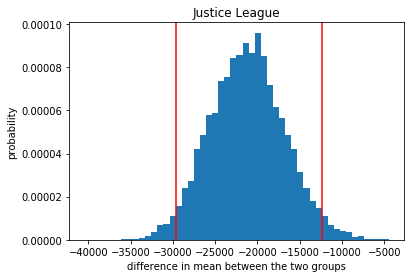

In [18]:
plt.hist(bootstrap_mean, bins=50, density=True)
plt.axvline(conf_interval[0], color='red')
plt.axvline(conf_interval[1], color='red')
plt.title("Justice League")
plt.xlabel('difference in mean between the two groups')
plt.ylabel('probability')
plt.savefig('Justice_Stat.png', dpi=300, bbox_inches='tight')
plt.show()

In [19]:
# P Value

In [20]:
stats.ttest_ind(movie, no_movie, equal_var = False)

Ttest_indResult(statistic=-4.70051770713, pvalue=2.9524334408364556e-05)

In [21]:
# Linear Regression

In [22]:
#Without Movie_Playing External Predictor

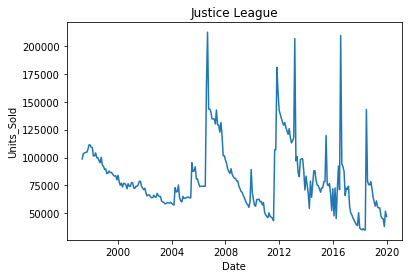

In [23]:
plt.title("Justice League")
sns.lineplot(x=Justice.index, y=Justice.Units_Sold, data=Justice)
plt.savefig('Justice_Line.png', dpi=300, bbox_inches='tight')

In [24]:
train = Justice.loc['1997-04-30':'2015-01-31']
test= Justice.loc['2015-02-28':]

In [25]:
train.head()

,Units_Sold,Movie_Playing
Date,,
1997-04-30,98818.0,0.0
1997-05-31,103498.0,0.0
1997-06-30,104030.0,0.0
1997-07-31,104675.0,0.0
1997-08-31,104676.0,0.0


In [26]:
test.head()

,Units_Sold,Movie_Playing
Date,,
2015-02-28,72904.0,0.0
2015-03-31,72904.0,0.0
2015-04-30,78388.0,0.0
2015-05-31,78388.0,0.0
2015-06-30,119779.0,0.0


In [27]:
test_no_movie = Justice[['Units_Sold']]
test_no_movie = test_no_movie.loc['2015-02-28':]
train_no_movie = Justice[['Units_Sold']]
train_no_movie = train_no_movie.loc['1997-04-30':'2015-01-31']

In [28]:
train.shape

(214, 2)

In [29]:
test.shape

(59, 2)

In [30]:
#Find p, d, and q values to build ARIMA model
#P is the order of the Auto Regressive (AR) term or the number of lags of Y to be used as predictors
#D is the number of differencing required to make the time series stationary
#Q is the order of the Moving Average (MA) term or the number of lagged forecast errors that should go into the ARIMA model

In [31]:
#ARIMA

In [32]:
#Auto ARIMA Forecast to choose best p,d,q
model_train_arima = pm.auto_arima(train[['Units_Sold']], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True,
                      stepwise=True)

print(model_train_arima.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=4717.988, BIC=4731.433, Time=0.079 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=4724.894, BIC=4731.617, Time=0.013 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=4718.400, BIC=4728.484, Time=0.032 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=4717.479, BIC=4727.563, Time=0.039 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=4722.914, BIC=4726.275, Time=0.011 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=4718.932, BIC=4732.377, Time=0.052 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=4720.088, BIC=4736.894, Time=0.107 seconds
Total fit time: 0.350 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  214
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2355.739
Date:                Thu, 06 Aug 2020   AIC  

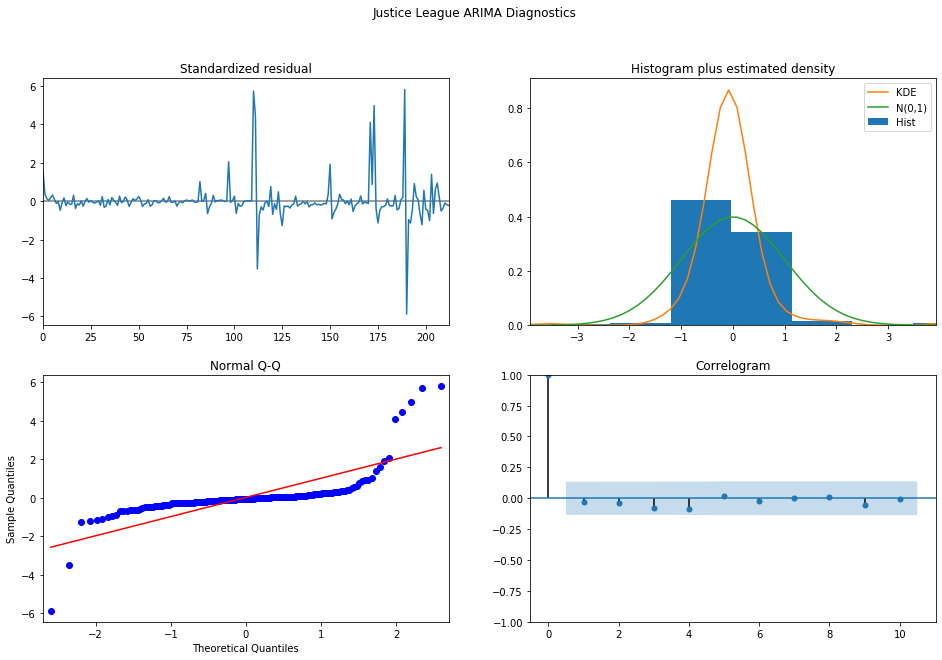

In [33]:
model_train_arima.plot_diagnostics(figsize=(16,10))
plt.suptitle("Justice League ARIMA Diagnostics")
plt.savefig('Justice_Diag_ARIMA.png', dpi=300, bbox_inches='tight')
plt.show()

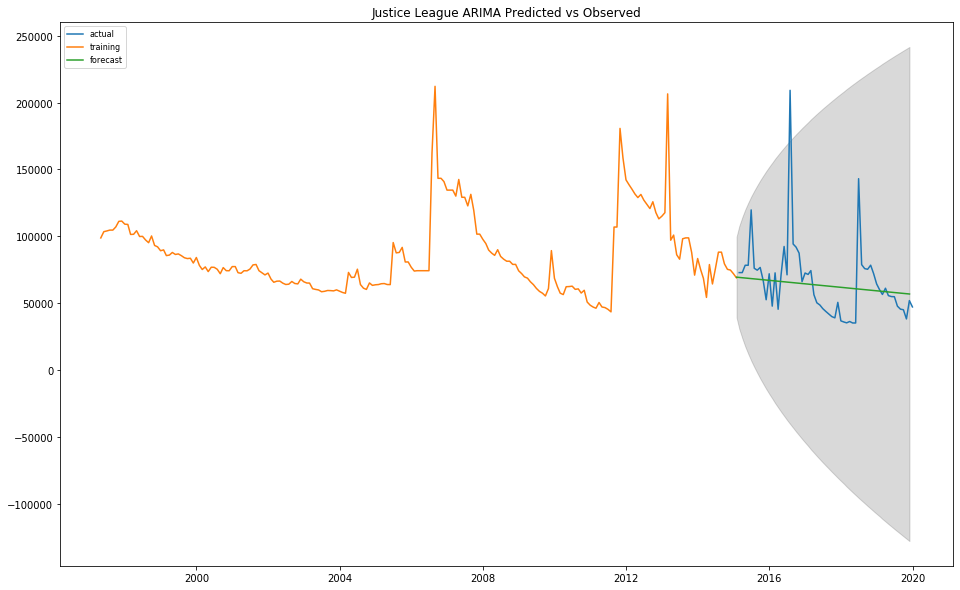

In [34]:
# Forecast
n_periods_arima = 59
fc_arima, confint_arima = model_train_arima.predict(n_periods=n_periods_arima, return_conf_int=True)
index_of_fc_arima = pd.date_range(train.index[-1], periods = n_periods_arima, freq='MS')

# make series for plotting purpose
fc_series_arima = pd.Series(fc_arima, index=index_of_fc_arima)
lower_series_arima = pd.Series(confint_arima[:, 0], index=index_of_fc_arima)
upper_series_arima = pd.Series(confint_arima[:, 1], index=index_of_fc_arima)

# Plot
plt.figure(figsize=(16,10))
plt.plot(test_no_movie, label='actual')
plt.plot(train_no_movie, label='training')
plt.plot(fc_series_arima, label='forecast')
plt.fill_between(lower_series_arima.index, lower_series_arima, upper_series_arima, color='k', alpha=.15)
plt.title("Justice League ARIMA Predicted vs Observed")
plt.legend(loc='upper left', fontsize=8)
plt.savefig('Justice_Predict_ARIMA.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [36]:
mean_absolute_percentage_error(test_no_movie, fc_series_arima)

30.43405040391274

In [37]:
#SARIMA

In [38]:
#Auto SARIMA Forecast to choose best p,d,q
model_train_sarima = pm.auto_arima(train[['Units_Sold']], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True,
                      stepwise=True)

print(model_train_sarima.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=4520.092, BIC=4536.609, Time=0.829 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=4601.790, BIC=4608.396, Time=0.048 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=4548.752, BIC=4561.966, Time=0.426 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=4519.067, BIC=4532.281, Time=0.514 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=4600.194, BIC=4603.498, Time=0.029 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=4594.320, BIC=4604.230, Time=0.134 seconds
Fit ARIMA(0,1,1)x(1,1,1,12) [intercept=True]; AIC=4511.371, BIC=4527.888, Time=2.494 seconds
Fit ARIMA(0,1,1)x(1,1,0,12) [intercept=True]; AIC=4548.274, BIC=4561.487, Time=0.434 seconds
Fit ARIMA(0,1,1)x(2,1,1,12) [intercept=True]; AIC=4522.729, BIC=4542.549, Time=4.690 seconds
Fit ARIMA(0,1,1)x(1,1,2,12) [intercept=True]; AIC=4503.499, BIC=4523.319, Time=27.122 seconds
Near non-invertible roots

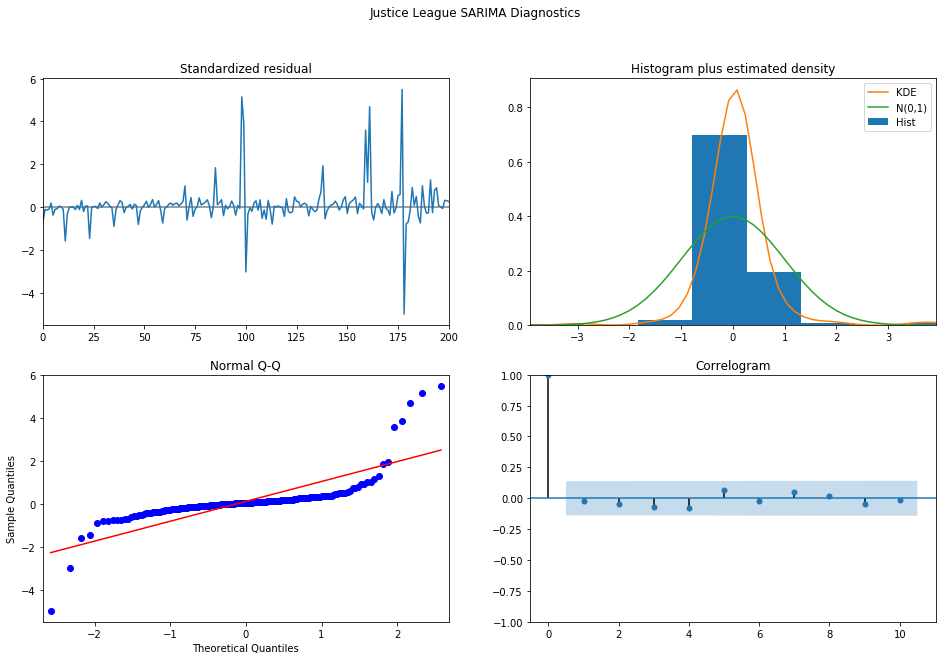

In [39]:
model_train_sarima.plot_diagnostics(figsize=(16,10))
plt.suptitle("Justice League SARIMA Diagnostics")
plt.savefig('Justice_Diag_SARIMA.png', dpi=300, bbox_inches='tight')
plt.show()

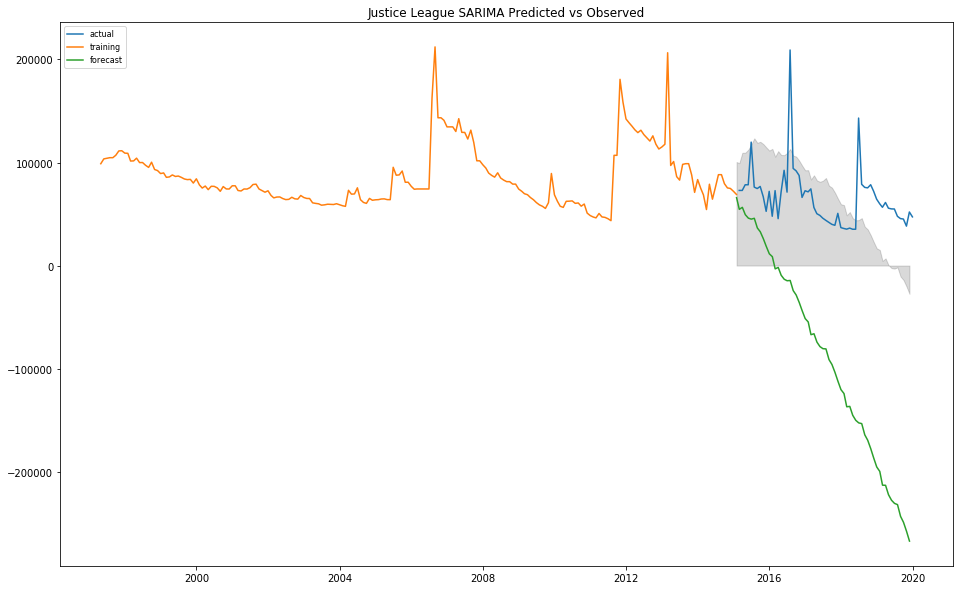

In [40]:
# Forecast
n_periods_sarima = 59
fc_sarima, confint_sarima = model_train_sarima.predict(n_periods=n_periods_sarima, return_conf_int=True)
index_of_fc_sarima = pd.date_range(train.index[-1], periods = n_periods_sarima, freq='MS')

# make series for plotting purpose
fc_series_sarima = pd.Series(fc_sarima, index=index_of_fc_sarima)
lower_series_sarima = pd.Series(confint_sarima[:, 0], index=index_of_fc_sarima)
upper_series_sarima = pd.Series(confint_sarima[:, 1], index=index_of_fc_sarima)

# Plot
plt.figure(figsize=(16,10))
plt.plot(test_no_movie, label='actual')
plt.plot(train_no_movie, label='training')
plt.plot(fc_series_sarima, label='forecast')
plt.fill_between(upper_series_sarima.index, upper_series_sarima, color='k', alpha=.15)
plt.title("Justice League SARIMA Predicted vs Observed")
plt.legend(loc='upper left', fontsize=8)
plt.savefig('Justice_Predict_SARIMA.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
mean_absolute_percentage_error(test_no_movie, fc_series_sarima)

256.35578463438935

In [42]:
# With Movie_Playing External Predictor

In [43]:
#SARIMAX

In [44]:
#Auto SARIMAX Forecast to choose best p,d,q
model_train_sarimax = pm.auto_arima(train[['Units_Sold']], exogenous=train[['Movie_Playing']], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=12,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=1, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True,
                      stepwise=True)

print(model_train_sarimax.summary())

Performing stepwise search to minimize aic
Fit ARIMA(1,1,1)x(0,1,1,12) [intercept=True]; AIC=4522.125, BIC=4541.945, Time=1.052 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=True]; AIC=4603.781, BIC=4613.691, Time=0.072 seconds
Fit ARIMA(1,1,0)x(1,1,0,12) [intercept=True]; AIC=4550.945, BIC=4567.461, Time=0.596 seconds
Fit ARIMA(0,1,1)x(0,1,1,12) [intercept=True]; AIC=4521.126, BIC=4537.642, Time=0.641 seconds
Fit ARIMA(0,1,0)x(0,1,0,12) [intercept=False]; AIC=5467.747, BIC=5474.353, Time=0.061 seconds
Fit ARIMA(0,1,1)x(0,1,0,12) [intercept=True]; AIC=4596.324, BIC=4609.537, Time=0.171 seconds
Fit ARIMA(0,1,1)x(1,1,1,12) [intercept=True]; AIC=4523.118, BIC=4542.938, Time=0.971 seconds
Fit ARIMA(0,1,1)x(0,1,2,12) [intercept=True]; AIC=4513.812, BIC=4533.632, Time=8.524 seconds
Fit ARIMA(0,1,1)x(1,1,2,12) [intercept=True]; AIC=4524.869, BIC=4547.992, Time=5.943 seconds
Fit ARIMA(0,1,0)x(0,1,2,12) [intercept=True]; AIC=4529.073, BIC=4545.589, Time=1.157 seconds
Fit ARIMA(1,1,1)x(0,1,2,12

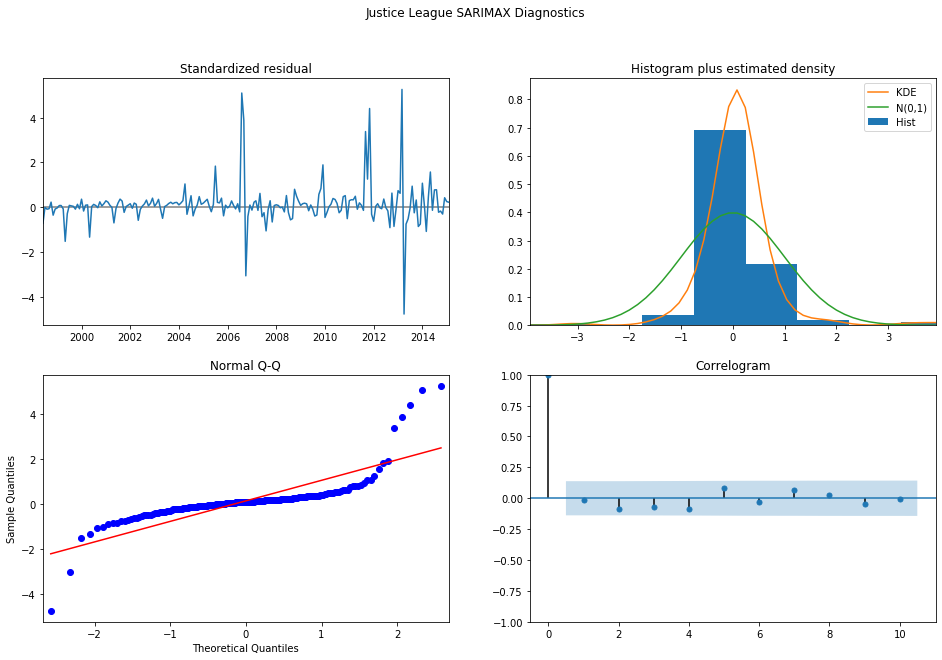

In [45]:
model_train_sarimax.plot_diagnostics(figsize=(16,10))
plt.suptitle("Justice League SARIMAX Diagnostics")
plt.savefig('Justice_Diag_SARIMAX.png', dpi=300, bbox_inches='tight')
plt.show()

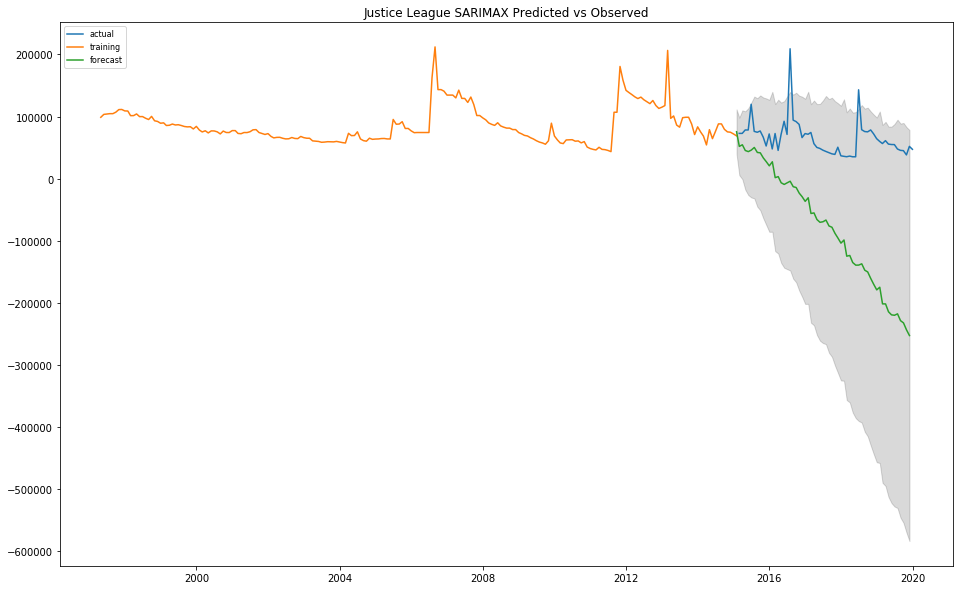

In [46]:
# Forecast
n_periods_sarimax = 59
fc_sarimax, confint_sarimax = model_train_sarimax.predict(n_periods=n_periods_sarimax, exogenous=test[['Movie_Playing']], 
                                                          return_conf_int=True)
index_of_fc_sarimax = pd.date_range(train.index[-1], periods = n_periods_sarimax, freq='MS')

# make series for plotting purpose
fc_series_sarimax = pd.Series(fc_sarimax, index=index_of_fc_sarimax)
lower_series_sarimax = pd.Series(confint_sarimax[:, 0], index=index_of_fc_sarimax)
upper_series_sarimax = pd.Series(confint_sarimax[:, 1], index=index_of_fc_sarimax)

# Plot
plt.figure(figsize=(16,10))
plt.plot(test[['Units_Sold']], label='actual')
plt.plot(train[['Units_Sold']], label='training')
plt.plot(fc_series_sarimax, label='forecast')
plt.fill_between(lower_series_sarimax.index, lower_series_sarimax, upper_series_sarimax, color='k', alpha=.15)
plt.title("Justice League SARIMAX Predicted vs Observed")
plt.legend(loc='upper left', fontsize=8)
plt.savefig('Justice_Predict_SARIMAX.png', dpi=300, bbox_inches='tight')
plt.show()

In [47]:
mean_absolute_percentage_error(test_no_movie, fc_series_sarimax)

236.88713948730958